In [1]:
%pip install "transformers>=4.49.0" accelerate peft bitsandbytes datasets "qwen-vl-utils[decord]==0.0.8" "comet-ml>=3.31.0" "huggingface_hub[hf_xet]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.6/729.6 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
import os
import json
import PIL


In [ ]:
!nvidia-smi

Wed Jul 30 22:40:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.07                 Driver Version: 566.07         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   71C    P8             13W /   90W |       1MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!unzip real_diagrams.zip

Archive:  real_diagrams.zip
   creating: real_diagrams/
   creating: real_diagrams/images/
  inflating: real_diagrams/images/schema_0000.png  
  inflating: real_diagrams/images/schema_0001.png  
  inflating: real_diagrams/images/schema_0002.png  
  inflating: real_diagrams/images/schema_0003.png  
  inflating: real_diagrams/images/schema_0004.png  
  inflating: real_diagrams/images/schema_0005.png  
  inflating: real_diagrams/images/schema_0006.png  
  inflating: real_diagrams/images/schema_0007.png  
  inflating: real_diagrams/images/schema_0008.png  
  inflating: real_diagrams/images/schema_0009.png  
  inflating: real_diagrams/images/schema_0010.png  
  inflating: real_diagrams/images/schema_0011.png  
  inflating: real_diagrams/images/schema_0012.png  
  inflating: real_diagrams/images/schema_0013.png  
  inflating: real_diagrams/images/schema_0014.png  
  inflating: real_diagrams/images/schema_0015.png  
  inflating: real_diagrams/images/schema_0016.png  
  inflating: real_diagram

In [4]:
import json
from pathlib import Path

# Load real schema dataset from training.py approach
dataset_file = Path("/content/real_diagrams/training_dataset.json")

if not dataset_file.exists():
    print(f"❌ Dataset not found: {dataset_file}")
    print("Please create the dataset first using your data generation script.")
else:
    print(f"✅ Using dataset: {dataset_file}")
    with open(dataset_file, 'r') as f:
        real_data = json.load(f)

    print(f"Loaded {len(real_data)} samples from real schema dataset")

✅ Using dataset: /content/real_diagrams/training_dataset.json
Loaded 402 samples from real schema dataset


In [5]:
print(f"Real schema dataset contains {len(real_data)} samples")
print(f"Sample keys: {list(real_data[0].keys()) if real_data else 'No data'}")
if real_data:
    print(f"First sample structure:")
    for key, value in real_data[0].items():
        print(f"  {key}: {type(value).__name__}")
        if key == 'schema_json' and isinstance(value, dict):
            print(f"    schema_json keys: {list(value.keys())}")
        elif key == 'image':
            print(f"    image path: {value}")

Real schema dataset contains 402 samples
Sample keys: ['id', 'image', 'schema_json', 'sql_output', 'domain', 'source', 'num_tables', 'num_relationships']
First sample structure:
  id: int
  image: str
    image path: real_diagrams\images\schema_0000.png
  schema_json: dict
    schema_json keys: ['domain', 'source', 'tables', 'relationships']
  sql_output: str
  domain: str
  source: str
  num_tables: int
  num_relationships: int


In [6]:
if real_data:
    print("First sample from real schema dataset:")
    sample = real_data[0]
    print(f"Image path: {sample['image']}")
    print(f"Schema JSON keys: {list(sample['schema_json'].keys())}")
    print(f"Schema JSON preview:")
    print(json.dumps(sample['schema_json'], indent=2)[:500] + "...")

First sample from real schema dataset:
Image path: real_diagrams\images\schema_0000.png
Schema JSON keys: ['domain', 'source', 'tables', 'relationships']
Schema JSON preview:
{
  "domain": "school",
  "source": "programmatic",
  "tables": [
    {
      "name": "students",
      "columns": [
        {
          "name": "id",
          "type": "INTEGER",
          "primary_key": true
        },
        {
          "name": "date_of_birth",
          "type": "DATE"
        },
        {
          "name": "email",
          "type": "VARCHAR(255)",
          "unique": true
        },
        {
          "name": "is_active",
          "type": "BOOLEAN",
          "default": ...


In [7]:
SYSTEM_MESSAGE = """You are a Vision Language Model specialized in extracting structured database schema information from ER diagrams.

Your task is to analyze the provided database schema diagram and extract the complete schema information into a well-structured JSON format.

The diagram shows tables with their columns, data types, primary keys (🔑), foreign keys (🔗), and relationships between tables.

Focus on identifying:
1. All table names accurately
2. All column names and their data types
3. Primary keys (marked with 🔑 icon)
4. Foreign key relationships between tables
5. Data constraints (NOT NULL, UNIQUE, DEFAULT values)

Provide only the JSON output based on the extracted information. Avoid additional explanations or comments."""

In [8]:
def format_data(entry):
    return [
        {
            "role": "system",
            "content": [{"type": "text", "text": SYSTEM_MESSAGE}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    # Load PIL image from path for real schema data
                    "image": entry["image"] if isinstance(entry["image"], str) else entry["image"],
                },
                {
                    "type": "text",
                    "text": "Extract data in JSON format",
                },
            ],
        },
        {
            "role": "assistant",
            "content": [{"type": "text", "text": json.dumps(entry["schema_json"], ensure_ascii=False)}],
        },
    ]

In [9]:
# Split real schema data into train/eval sets
import random
random.seed(42)

# Calculate split sizes (similar to training.py)
total_size = len(real_data)
train_split = 0.8
val_split = 0.2

train_size = int(train_split * total_size)
val_size = total_size - train_size

# Shuffle and split
shuffled_data = real_data.copy()
random.shuffle(shuffled_data)

train_data = shuffled_data[:train_size]
eval_data = shuffled_data[train_size:]

print(f"Dataset splits:")
print(f"  Total: {total_size} samples")
print(f"  Train: {len(train_data)} samples")
print(f"  Eval: {len(eval_data)} samples")

Dataset splits:
  Total: 402 samples
  Train: 321 samples
  Eval: 81 samples


In [10]:
from PIL import Image
import os

def load_real_schema_data(data_list):
    """Load and format real schema data with proper image handling"""
    formatted_data = []
    base_path = Path(r"d:\Study\Project\dbdiagram2sql")

    for entry in data_list:
        # Handle image loading like in training.py
        image_path = entry['image']
        if not os.path.exists(image_path):
            # Convert Windows path separators and handle relative paths
            image_path = image_path.replace('\\', '/')
            if not os.path.exists(image_path):
                # Try relative to project directory
                image_path = base_path / "real_diagrams" / "images" / Path(image_path).name

        try:
            image = Image.open(image_path).convert('RGB')
            # Create new entry with loaded image
            entry_with_image = entry.copy()
            entry_with_image['image'] = image
            formatted_data.append((entry_with_image, format_data(entry_with_image)))
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # Create a dummy white image as fallback
            image = Image.new('RGB', (800, 600), color='white')
            entry_with_image = entry.copy()
            entry_with_image['image'] = image
            formatted_data.append((entry_with_image, format_data(entry_with_image)))

    return formatted_data

train_dataset = load_real_schema_data(train_data)
eval_dataset = load_real_schema_data(eval_data)

print(f"Formatted train dataset: {len(train_dataset)} samples")
print(f"Formatted eval dataset: {len(eval_dataset)} samples")

Formatted train dataset: 321 samples
Formatted eval dataset: 81 samples


In [11]:
# 2 values, first value is dataset entry, the second one is the chat template with dataset applied
train_dataset[0]

({'id': 151,
  'image': <PIL.Image.Image image mode=RGB size=2085x1434>,
  'schema_json': {'domain': 'school',
   'source': 'programmatic',
   'tables': [{'name': 'students',
     'columns': [{'name': 'id', 'type': 'INTEGER', 'primary_key': True},
      {'name': 'created_at',
       'type': 'TIMESTAMP',
       'default': 'CURRENT_TIMESTAMP'},
      {'name': 'address', 'type': 'TEXT'},
      {'name': 'name', 'type': 'VARCHAR(255)', 'nullable': False}]},
    {'name': 'teachers',
     'columns': [{'name': 'id', 'type': 'INTEGER', 'primary_key': True},
      {'name': 'status', 'type': 'VARCHAR(50)', 'default': "'active'"},
      {'name': 'date_of_birth', 'type': 'DATE'},
      {'name': 'description', 'type': 'TEXT'},
      {'name': 'is_active', 'type': 'BOOLEAN', 'default': 'true'}]},
    {'name': 'courses',
     'columns': [{'name': 'id', 'type': 'INTEGER', 'primary_key': True},
      {'name': 'rating', 'type': 'FLOAT'},
      {'name': 'salary', 'type': 'DECIMAL(12,2)'},
      {'name': 'p

In [19]:
import torch
from peft import get_peft_model, LoraConfig
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor

# Using same model as training.py
MODEL_ID = "Qwen/Qwen2.5-VL-3B-Instruct"

# LoRA config similar to training.py but adjusted for full precision training
lora_config = LoraConfig(
    lora_alpha=32,
    lora_dropout=0.1,
    r=16,
    bias="none",
    target_modules=["q_proj", "v_proj", "k_proj", "o_proj"],  # More targets like training.py
    task_type="CAUSAL_LM",
)

model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    MODEL_ID,
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

trainable params: 7,372,800 || all params: 3,761,995,776 || trainable%: 0.1960


In [20]:
# Reduced pixel limits for memory efficiency (similar to training.py)
MAX_PIXELS = 1024 * 28 * 28  # Reduced from original
MIN_PIXELS = 256 * 28 * 28

processor = AutoProcessor.from_pretrained(
    MODEL_ID, min_pixels=MIN_PIXELS, max_pixels=MAX_PIXELS
)

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [21]:
from qwen_vl_utils import process_vision_info

def training_collate_fn(batch):
    """Collate function based on training.py approach"""
    # Get only the formatted data (second element of tuple)
    _, formatted_data = zip(*batch)

    # Apply chat template to get texts
    texts = [processor.apply_chat_template(entry) for entry in formatted_data]

    # Process vision info to get images
    image_inputs = [
        process_vision_info(entry)[0]  # Only takes the PIL image
        for entry in formatted_data
    ]

    # Process with Qwen2VL processor
    model_inputs = processor(
        text=texts,
        images=image_inputs,
        padding=True,
        return_tensors="pt",
    )

    labels = model_inputs["input_ids"].clone()  # Clone for masking

    # Mask system message and image token IDs in labels (key part from training.py)
    for i, example in enumerate(formatted_data):
        sysuser_conv = example[:-1]  # Remove assistant response
        sysuser_text = processor.apply_chat_template(sysuser_conv, tokenize=False)
        sysuser_img, _ = process_vision_info(sysuser_conv)

        sysuser_inputs = processor(
            text=[sysuser_text],
            images=[sysuser_img],
            return_tensors="pt",
            padding=True,
        )

        sysuser_len = sysuser_inputs["input_ids"].shape[1]
        labels[i, :sysuser_len] = -100  # Mask input tokens

    return {
        'input_ids': model_inputs["input_ids"],
        'attention_mask': model_inputs["attention_mask"],
        'pixel_values': model_inputs["pixel_values"],
        'image_grid_thw': model_inputs["image_grid_thw"],
        'labels': labels
    }

In [22]:
def evaluating_collate_fn(batch):
    """Evaluation collate function based on training.py"""
    data, formatted_data = zip(*batch)
    ground_truth = [json.dumps(entry["schema_json"], ensure_ascii=False) for entry in data]

    # Remove assistant answer for evaluation
    formatted_data = [entry[:2] for entry in formatted_data]

    texts = [
        processor.apply_chat_template(entry, tokenize=False) for entry in formatted_data
    ]

    image_inputs = [process_vision_info(entry)[0] for entry in formatted_data]

    model_inputs = processor(
        text=texts,
        images=image_inputs,
        return_tensors="pt",
        padding=True,
    )

    return {
        'input_ids': model_inputs["input_ids"],
        'attention_mask': model_inputs["attention_mask"],
        'pixel_values': model_inputs["pixel_values"],
        'image_grid_thw': model_inputs["image_grid_thw"],
        'ground_truth': ground_truth
    }

In [23]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
NUM_WORKERS = 4

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=training_collate_fn,
    num_workers=NUM_WORKERS,
    pin_memory=True,
    persistent_workers=True,
)
eval_loader = DataLoader(
    eval_dataset,
    batch_size=BATCH_SIZE,
    collate_fn=evaluating_collate_fn,
    num_workers=NUM_WORKERS,
    pin_memory=True,
)

In [24]:
%pip install -q lightning nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 54.5 MB/s eta 0:00:00


In [30]:
from lightning.pytorch.loggers import CometLogger

comet_logger = CometLogger(
    api_key=os.environ.get("COMET_API_KEY"),
    project="diagrams2sql",
    workspace="dvnguyen02",
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, keras, sklearn, tensorflow.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dvnguyen02/diagrams2sql/4f17bae8710643ac8199226e4f63fbd5



In [31]:
import lightning as L
import json
from torch.optim import AdamW

class RealSchemaTrainer(L.LightningModule):
    """Lightning module based on training.py approach"""

    def __init__(self, model, processor, config):
        super().__init__()
        self.model = model
        self.processor = processor
        self.config = config

    def training_step(self, batch):
        outputs = self.model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            pixel_values=batch["pixel_values"],
            image_grid_thw=batch["image_grid_thw"],
            labels=batch["labels"],
        )
        loss = outputs.loss
        self.log("train_loss", loss, logger=True, prog_bar=True)
        return loss

    def validation_step(self, batch):
        ground_truths = batch["ground_truth"]

        generated_ids = self.model.generate(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            pixel_values=batch["pixel_values"],
            image_grid_thw=batch["image_grid_thw"],
            max_new_tokens=512,  # Reduced for memory
            do_sample=False,
            temperature=1.0,
        )

        # Trim input tokens from generated output
        trimmed_generated_ids = [
            out_ids[len(in_ids):] for in_ids, out_ids in zip(batch["input_ids"], generated_ids)
        ]

        generated_json = self.processor.batch_decode(
            trimmed_generated_ids,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=False,
        )

        # Improved evaluation metric from training.py
        scores = []
        for i, (generated, ground_truth) in enumerate(zip(generated_json, ground_truths)):
            try:
                # Try to parse both as JSON to check structure similarity
                gen_json = json.loads(generated.strip())
                gt_json = json.loads(ground_truth.strip())

                # Check if both have tables and relationships keys
                has_tables = "tables" in gen_json and "tables" in gt_json
                has_relationships = "relationships" in gen_json and "relationships" in gt_json

                if has_tables and has_relationships:
                    # Simple structural similarity
                    gen_table_count = len(gen_json.get("tables", []))
                    gt_table_count = len(gt_json.get("tables", []))
                    table_score = min(gen_table_count, gt_table_count) / max(gen_table_count, gt_table_count, 1)

                    gen_rel_count = len(gen_json.get("relationships", []))
                    gt_rel_count = len(gt_json.get("relationships", []))
                    rel_score = min(gen_rel_count, gt_rel_count) / max(gen_rel_count, gt_rel_count, 1)

                    score = (table_score + rel_score) / 2
                else:
                    score = 0.1

            except (json.JSONDecodeError, KeyError):
                # Fall back to string similarity if JSON parsing fails
                score = 0.05 if any(word in generated.lower() for word in ["table", "column", "relationship"]) else 0.0

            scores.append(score)

            # Log some examples for debugging
            if i < 1:  # Log first example only
                print(f"\nExample {i}:")
                print(f"Generated (first 150 chars): {generated[:150]}...")
                print(f"Ground truth (first 150 chars): {ground_truth[:150]}...")
                print(f"Score: {score:.3f}")

        accuracy = sum(scores) / len(scores)
        self.log("val_accuracy", accuracy, logger=True, prog_bar=True, batch_size=len(scores))
        return scores

    def configure_optimizers(self):
        optimizer = AdamW(self.model.parameters(), lr=self.config.get("lr"))
        return optimizer

In [32]:
config = {
    "max_epochs": 8,
    "batch_size": 4,
    "lr": 1e-4,
    "check_val_every_n_epoch": 2,
    "gradient_clip_val": 1.0,
    "accumulate_grad_batches": 8,
    "num_nodes": 1,
    "warmup_steps": 50,
    "result_path": "real_schema_model",
}

In [33]:
model_module = RealSchemaTrainer(model, processor, config)

In [34]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import Callback

# Monitor val_accuracy (higher is better) instead of edit distance
early_stopping_callback = EarlyStopping(
    monitor="val_accuracy", patience=4, verbose=False, mode="max"
)

class SaveCheckpoint(Callback):
    def __init__(self, result_path):
        self.result_path = result_path
        self.epoch = 0

    def on_train_epoch_end(self, trainer, pl_module):
        checkpoint_path = f"{self.result_path}/{self.epoch}"
        os.makedirs(checkpoint_path, exist_ok=True)

        pl_module.processor.save_pretrained(checkpoint_path)
        pl_module.model.save_pretrained(checkpoint_path)
        print(f"Checkpoint saved at {checkpoint_path}")

        self.epoch += 1

    def on_train_end(self, trainer, pl_module):
        checkpoint_path = f"{self.result_path}/latest"
        os.makedirs(checkpoint_path, exist_ok=True)

        pl_module.processor.save_pretrained(checkpoint_path)
        pl_module.model.save_pretrained(checkpoint_path)
        print(f"(Train Ended) -- Checkpoint saved at {checkpoint_path}")

In [35]:
trainer = L.Trainer(
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    max_epochs=config.get("max_epochs"),
    check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
    accumulate_grad_batches=config.get("accumulate_grad_batches"),
    gradient_clip_val=config.get("gradient_clip_val"),
    log_every_n_steps=5,
    limit_val_batches=10,
    callbacks=[early_stopping_callback, SaveCheckpoint(config.get("result_path"))],
    logger=comet_logger,
    precision="bf16-mixed",
)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [36]:
print("Starting training with real schema data...")
trainer.fit(model_module, train_loader, eval_loader)

INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Starting training with real schema data...


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type                 | Params | Mode 
-------------------------------------------------------
0 | model | PeftModelForCausalLM | 3.8 B  | train
-------------------------------------------------------
7.4 M     Trainable params
3.8 B     Non-trainable params
3.8 B     Total params
15,047.983Total estimated model params size (MB)
1442      Modules in train mode
875       Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                 | Params | Mode 
-------------------------------------------------------
0 | model | PeftModelForCausalLM | 3.8 B  | train
-------------------------------------------------------
7.4 M     Trainable params
3.8 B     Non-trainable params
3.8 B     Total params
15,047.983Total estimated model params size (MB)
1442      Modules in train mode
875       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]


Example 0:
Generated (first 150 chars): ...
Ground truth (first 150 chars): {"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.000

Example 0:
Generated (first 150 chars): ...
Ground truth (first 150 chars): {"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.000


Training: |          | 0/? [00:00<?, ?it/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Checkpoint saved at real_schema_model/0


Validation: |          | 0/? [00:00<?, ?it/s]


Example 0:
Generated (first 150 chars): assistant
{"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "hospital", "source": "programmatic", "tables": [{"name": "patients", "columns": [{"name": "id", "type": "INTEGER", "primary_key"...
Ground truth (fir

Validation: |          | 0/? [00:00<?, ?it/s]


Example 0:
Generated (first 150 chars): assistant
{"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "hospital", "source": "programmatic", "tables": [{"name": "patients", "columns": [{"name": "id", "type": "INTEGER", "primary_key"...
Ground truth (fir

Validation: |          | 0/? [00:00<?, ?it/s]


Example 0:
Generated (first 150 chars): assistant
{"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "hospital", "source": "programmatic", "tables": [{"name": "patients", "columns": [{"name": "id", "type": "INTEGER", "primary_key"...
Ground truth (fir

Validation: |          | 0/? [00:00<?, ?it/s]


Example 0:
Generated (first 150 chars): assistant
{"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "crm", "source": "programmatic", "tables": [{"name": "customers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": tr...
Ground truth (first 150 chars): {"domain": "library", "source": "programmatic", "tables": [{"name": "books", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"nam...
Score: 0.050

Example 0:
Generated (first 150 chars): assistant
{"domain": "hospital", "source": "programmatic", "tables": [{"name": "patients", "columns": [{"name": "id", "type": "INTEGER", "primary_key"...
Ground truth (fir

INFO: `Trainer.fit` stopped: `max_epochs=8` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Checkpoint saved at real_schema_model/7
(Train Ended) -- Checkpoint saved at real_schema_model/latest


In [37]:
from pathlib import Path

print("Saving final model...")
final_model_path = Path(config["result_path"]) / "final_model"
final_model_path.mkdir(parents=True, exist_ok=True)

model_module.model.save_pretrained(final_model_path)
processor.save_pretrained(final_model_path)

# Save training metadata
training_info = {
    "model_name": MODEL_ID,
    "quantization": "none",
    "batch_size": config["batch_size"],
    "accumulate_grad_batches": config["accumulate_grad_batches"],
    "effective_batch_size": config["batch_size"] * config["accumulate_grad_batches"],
    "learning_rate": config["lr"],
    "max_epochs": config["max_epochs"],
    "train_samples": len(train_dataset),
    "eval_samples": len(eval_dataset),
}

with open(f"{config['result_path']}/training_info.json", 'w') as f:
    json.dump(training_info, f, indent=2)

print(f"✅ Training complete! Model saved to {final_model_path}")

# ADD THIS for permanent storage:
from google.colab import drive
drive.mount('/content/drive')
print("Backing up to Google Drive...")
!cp -r {config["result_path"]} /content/drive/MyDrive/
print("✅ Model backed up to Google Drive!")

Saving final model...
✅ Training complete! Model saved to real_schema_model/final_model
Mounted at /content/drive
Backing up to Google Drive...
✅ Model backed up to Google Drive!


In [48]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from huggingface_hub import create_repo

# Optional: Create repo if it doesn't exist yet
repo_name = "zodiac2525/Qwen2.5-VL-Diagrams2SQL"
create_repo(repo_name, private=True, exist_ok=True)  # set private=False if you want it public

# Load from local and push
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(final_model_path)
processor = AutoProcessor.from_pretrained(final_model_path)

model.push_to_hub(repo_name)
processor.push_to_hub(repo_name)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/zodiac2525/Qwen2.5-VL-Diagrams2SQL/commit/d2bd96ded1c59fe1385b2a8f55cdc7b8ee2118d9', commit_message='Upload processor', commit_description='', oid='d2bd96ded1c59fe1385b2a8f55cdc7b8ee2118d9', pr_url=None, repo_url=RepoUrl('https://huggingface.co/zodiac2525/Qwen2.5-VL-Diagrams2SQL', endpoint='https://huggingface.co', repo_type='model', repo_id='zodiac2525/Qwen2.5-VL-Diagrams2SQL'), pr_revision=None, pr_num=None)

In [49]:
from transformers import AutoProcessor, Qwen2_5_VLForConditionalGeneration
import torch
from PIL import Image
import json

# Load the model and processor from the Hugging Face Hub
model_id = "zodiac2525/Qwen2.5-VL-Diagrams2SQL"
processor = AutoProcessor.from_pretrained(model_id)
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto")

# Load a sample image
sample_image_path = "real_diagrams/images/schema_0000.png"
image = Image.open(sample_image_path).convert("RGB")

# Prepare the prompt
prompt = "Extract data in JSON format"
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": prompt}
        ]
    }
]

# Process the inputs
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = processor(text=[text], images=[image], return_tensors="pt").to("cuda")

# Generate the output
generated_ids = model.generate(
    inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    attention_mask=inputs["attention_mask"],
    image_grid_thw=inputs["image_grid_thw"],
    max_new_tokens=1024,
    do_sample=False
)

# Decode the output
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Print the generated JSON
print(generated_text)

config.json:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


system
You are a helpful assistant.
user
Extract data in JSON format
assistant
{"domain": "school", "source": "programmatic", "tables": [{"name": "students", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"name": "date_of_birth", "type": "DATE"}, {"name": "email", "type": "VARCHAR(255)", "unique": true}, {"name": "is_active", "type": "BOOLEAN", "default": "true"}, {"name": "rating", "type": "FLOAT"}, {"name": "name", "type": "VARCHAR(255)", "nullable": false}, {"name": "updated_at", "type": "TIMESTAMP", "default": "CURRENT_TIMESTAMP"}, {"name": "address", "type": "TEXT"}]}, {"name": "teachers", "columns": [{"name": "id", "type": "INTEGER", "primary_key": true}, {"name": "name", "type": "VARCHAR(255)", "nullable": false}, {"name": "description", "type": "TEXT"}, {"name": "quantity", "type": "INTEGER", "default": 0}, {"name": "is_active", "type": "BOOLEAN", "default": "true"}, {"name": "date_of_birth", "type": "DATE"}, {"name": "address", "type": "TEXT"}, {"name": "

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

--- Input Image ---


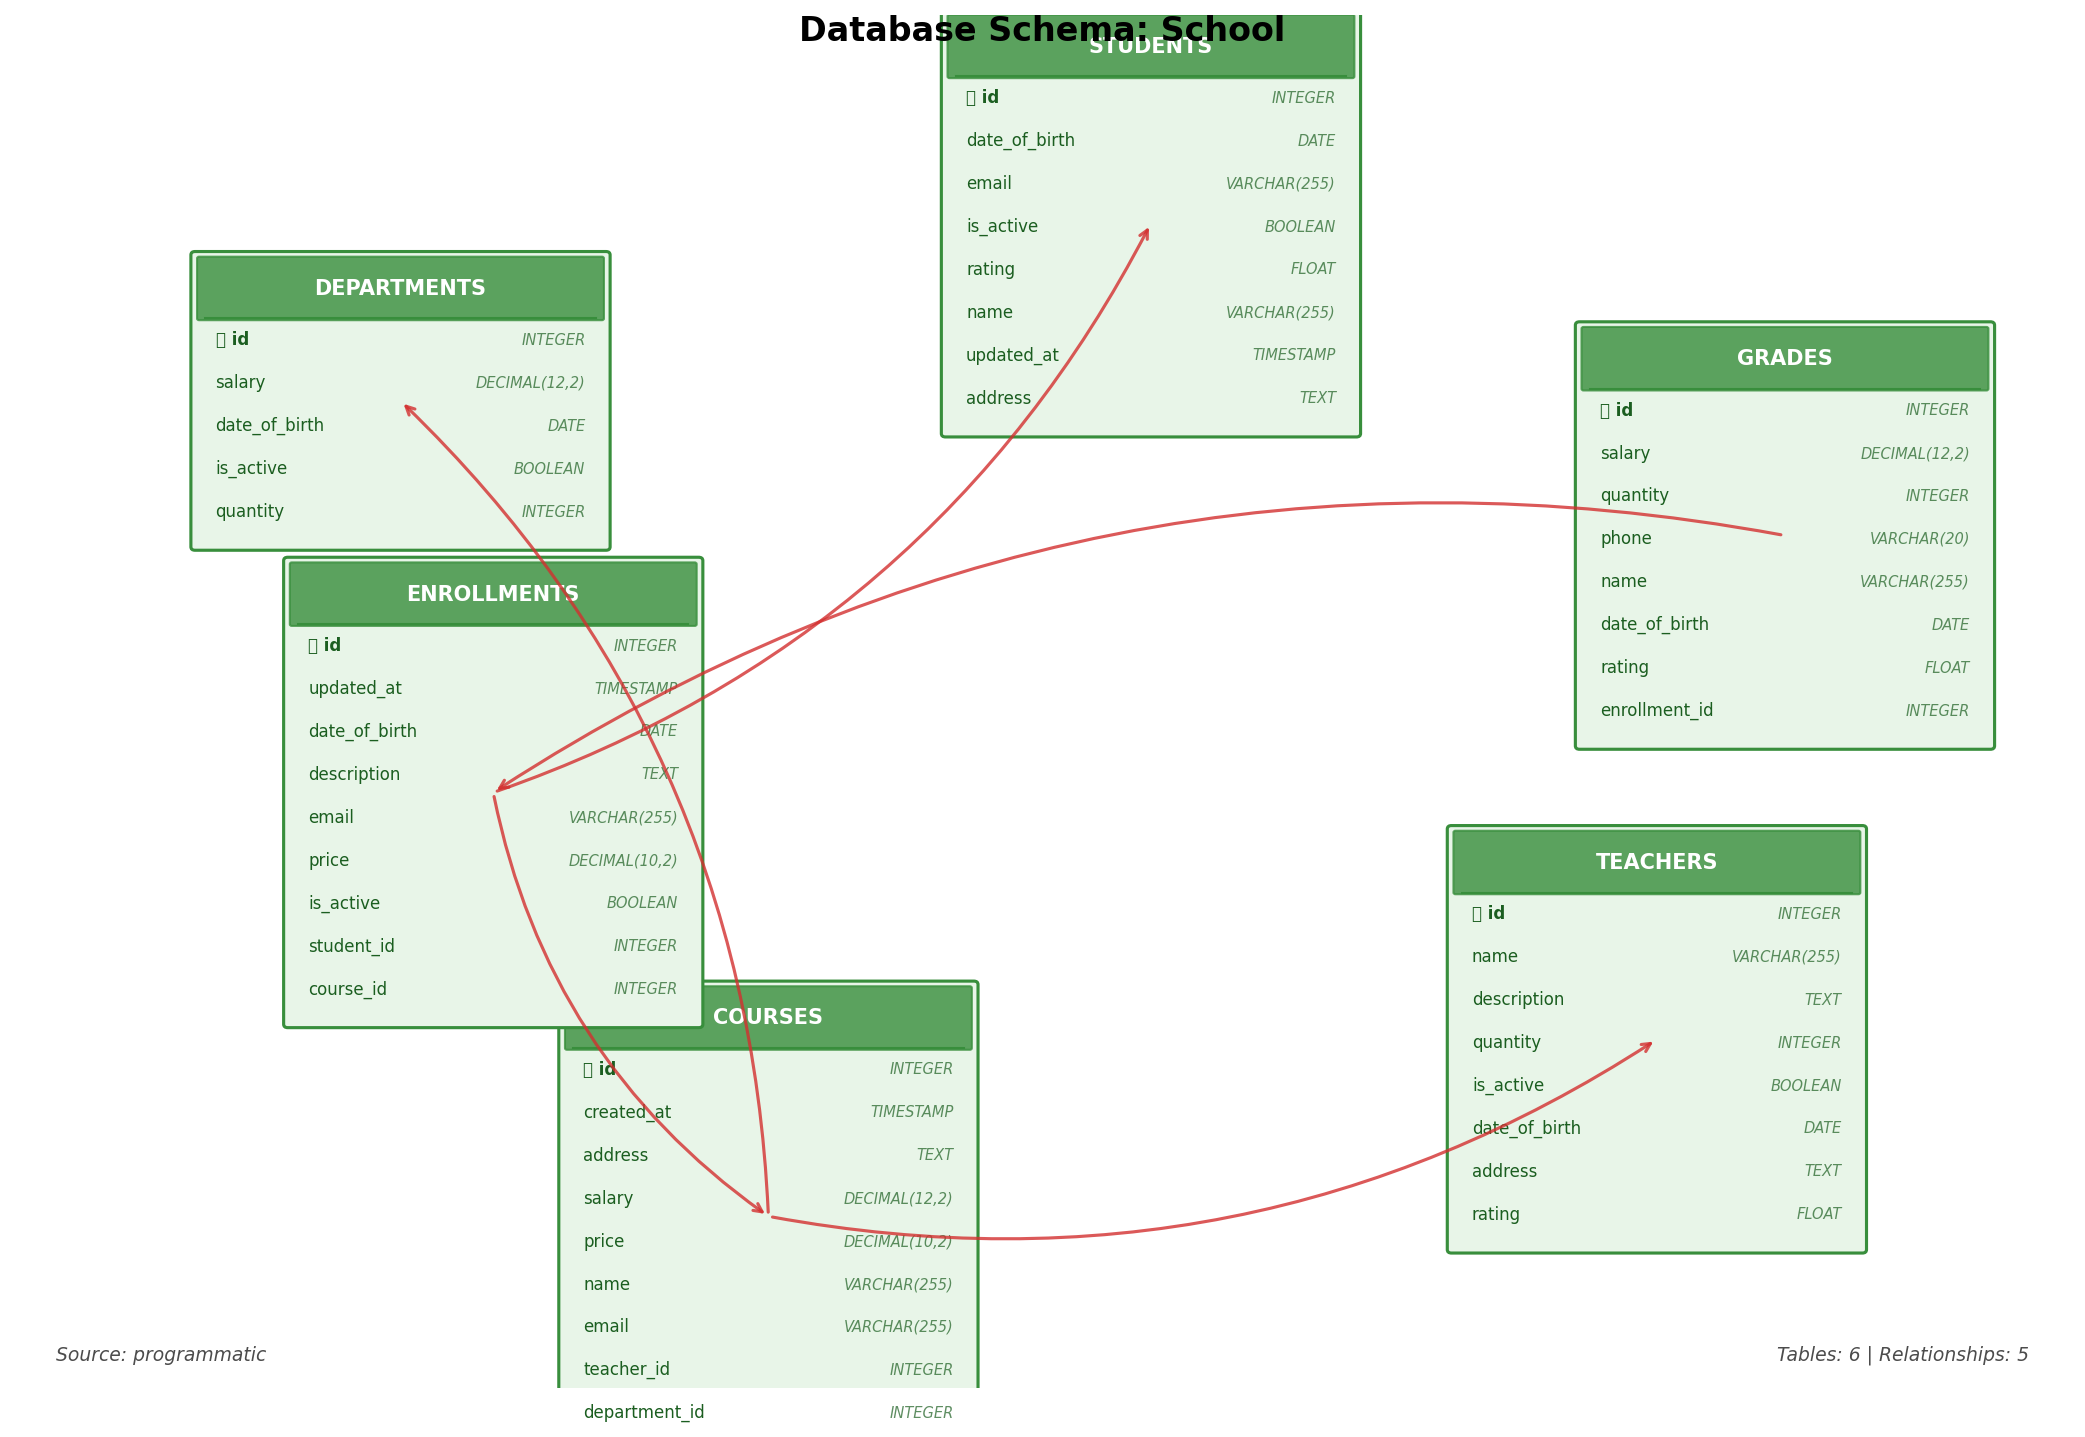

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



--- Generated Output ---
{
  "domain": "school",
  "source": "programmatic",
  "tables": [
    {
      "name": "students",
      "columns": [
        {
          "name": "id",
          "type": "INTEGER",
          "primary_key": true
        },
        {
          "name": "date_of_birth",
          "type": "DATE"
        },
        {
          "name": "email",
          "type": "VARCHAR(255)",
          "unique": true
        },
        {
          "name": "is_active",
          "type": "BOOLEAN",
          "default": "true"
        },
        {
          "name": "rating",
          "type": "FLOAT"
        },
        {
          "name": "name",
          "type": "VARCHAR(255)",
          "nullable": false
        },
        {
          "name": "updated_at",
          "type": "TIMESTAMP",
          "default": "CURRENT_TIMESTAMP"
        },
        {
          "name": "address",
          "type": "TEXT"
        }
      ]
    },
    {
      "name": "teachers",
      "columns": [
       

In [58]:
from transformers import AutoProcessor, Qwen2_5_VLForConditionalGeneration
import torch
from PIL import Image
import json
from IPython.display import display

# Load the model and processor from the Hugging Face Hub
model_id = "zodiac2525/Qwen2.5-VL-Diagrams2SQL"
processor = AutoProcessor.from_pretrained(model_id)
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto")

# Load a sample image.
# Note: You may need to upload 'real_diagrams.zip' and unzip it first for this to work.
sample_image_path = "real_diagrams/images/schema_0000.png"
try:
    image = Image.open(sample_image_path).convert("RGB")

    # --- Display the image ---
    print("--- Input Image ---")
    display(image)

    # Prepare the prompt
    prompt = "Extract data in JSON format"
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image},
                {"type": "text", "text": prompt}
            ]
        }
    ]

    # Process the inputs
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    inputs = processor(text=[text], images=[image], return_tensors="pt").to("cuda")

    # Generate the output
    generated_ids = model.generate(
        inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        attention_mask=inputs["attention_mask"],
        image_grid_thw=inputs["image_grid_thw"],
        max_new_tokens=1024,
        do_sample=False
    )

    # Decode the output
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Print the generated JSON
    print("\n--- Generated Output ---")
    # Find the start of the JSON object
    json_start_index = generated_text.find('{')
    if json_start_index != -1:
        json_output = generated_text[json_start_index:]
        # Pretty-print the JSON
        parsed_json = json.loads(json_output)
        print(json.dumps(parsed_json, indent=2))
    else:
        print("Could not find JSON in the output.")
        print(generated_text)


except FileNotFoundError:
    print(f"Error: Sample image not found at {sample_image_path}")
    print("Please make sure the image file exists. You may need to upload and unzip 'real_diagrams.zip' first.")

# Task
Benchmark the performance of the fine-tuned model `zodiac2525/Qwen2.5-VL-Diagrams2SQL` against the original base model `Qwen/Qwen2.5-VL-3B-Instruct` on the `eval_dataset` created during training. The benchmark should compare the generated JSON schemas from both models against the ground-truth schemas in the dataset. The comparison should focus on the accuracy of table and relationship counts. Finally, present the aggregated results in a pandas DataFrame for a clear side-by-side comparison.

## Load models and processor

### Subtask:
Load both the fine-tuned and base models from the Hugging Face Hub, along with the processor.


**Reasoning**:
I will now load the fine-tuned and base models from the Hugging Face Hub, along with the processor, as per the instructions. This involves importing the necessary libraries, defining the model IDs, and then loading the processor and both models with the specified configurations.



In [59]:
from transformers import AutoProcessor, Qwen2_5_VLForConditionalGeneration
import torch

# Define model IDs
fine_tuned_model_id = "zodiac2525/Qwen2.5-VL-Diagrams2SQL"
base_model_id = "Qwen/Qwen2.5-VL-3B-Instruct"

# Load the processor from the fine-tuned model's repository
processor = AutoProcessor.from_pretrained(fine_tuned_model_id)

# Load the fine-tuned model
fine_tuned_model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    fine_tuned_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# Load the base model
base_model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

print("Models and processor loaded successfully.")

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Models and processor loaded successfully.


## Prepare benchmark data

### Subtask:
Prepare the evaluation dataset for benchmarking by creating a DataLoader.


**Reasoning**:
I need to create a `DataLoader` for the `eval_dataset` to prepare it for benchmarking. This involves importing the `DataLoader` class, instantiating it with the correct dataset, batch size, and collate function, and then printing the number of batches to confirm its creation.



In [60]:
from torch.utils.data import DataLoader

# Create a DataLoader for the evaluation dataset
benchmark_loader = DataLoader(
    eval_dataset,
    batch_size=1,  # Process one image at a time
    collate_fn=evaluating_collate_fn
)

# Print the number of batches to confirm
print(f"Number of batches in benchmark_loader: {len(benchmark_loader)}")

Number of batches in benchmark_loader: 81


## Define evaluation logic

### Subtask:
Define the evaluation logic to compare the generated JSON schema with the ground-truth schema.


**Reasoning**:
I will define the `evaluate_schema` function as requested in the instructions. This function will take the generated and ground truth JSON strings, parse them, and then calculate the accuracy of table and relationship counts.



In [61]:
import json

def evaluate_schema(generated_json, ground_truth_json):
    """
    Compares a generated schema with a ground-truth schema.

    Args:
        generated_json (str): The JSON string of the generated schema.
        ground_truth_json (str): The JSON string of the ground-truth schema.

    Returns:
        dict: A dictionary with table and relationship count accuracies.
    """
    try:
        gen_data = json.loads(generated_json)
        gt_data = json.loads(ground_truth_json)

        # Table count accuracy
        gen_tables = len(gen_data.get("tables", []))
        gt_tables = len(gt_data.get("tables", []))
        table_accuracy = min(gen_tables, gt_tables) / max(gen_tables, gt_tables, 1)

        # Relationship count accuracy
        gen_rels = len(gen_data.get("relationships", []))
        gt_rels = len(gt_data.get("relationships", []))
        relationship_accuracy = min(gen_rels, gt_rels) / max(gen_rels, gt_rels, 1)

        return {
            "table_count_accuracy": table_accuracy,
            "relationship_count_accuracy": relationship_accuracy
        }
    except json.JSONDecodeError:
        return {
            "table_count_accuracy": 0.0,
            "relationship_count_accuracy": 0.0
        }

# Example usage with dummy data to test the function
dummy_generated = '{"tables": [{}, {}], "relationships": [{}]}'
dummy_ground_truth = '{"tables": [{}, {}, {}], "relationships": [{}, {}]}'
scores = evaluate_schema(dummy_generated, dummy_ground_truth)
print(f"Example evaluation scores: {scores}")

Example evaluation scores: {'table_count_accuracy': 0.6666666666666666, 'relationship_count_accuracy': 0.5}


## Run inference and evaluate

### Subtask:
Run inference on the benchmark data using both the fine-tuned and base models, and evaluate the results.


**Reasoning**:
I will now implement the inference and evaluation loop. This involves creating the `run_inference` function to generate text from a given model and batch. Then, I will iterate through the `benchmark_loader`, run inference with both the fine-tuned and base models, and use the `evaluate_schema` function to compare the results against the ground truth. The scores will be stored in `fine_tuned_results` and `base_results` lists. Finally, I will print a confirmation message.



In [ ]:
import json

fine_tuned_results = []
base_results = []

def run_inference(model, batch):
    generated_ids = model.generate(
        input_ids=batch["input_ids"].to(model.device),
        attention_mask=batch["attention_mask"].to(model.device),
        pixel_values=batch["pixel_values"].to(model.device),
        image_grid_thw=batch["image_grid_thw"].to(model.device),
        max_new_tokens=1024,
        do_sample=False,
    )

    decoded_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Extract JSON part
    try:
        # Find the start of the JSON object
        json_start_index = decoded_text.find('{')
        if json_start_index != -1:
            json_output = decoded_text[json_start_index:]
            # Validate if it's a complete JSON
            json.loads(json_output)
            return json_output
    except json.JSONDecodeError:
        pass

    return "{}" # Return empty JSON if parsing fails or no JSON is found

for batch in benchmark_loader:
    ground_truth_json = batch["ground_truth"][0]

    # Inference and evaluation for fine-tuned model
    fine_tuned_generated_json = run_inference(fine_tuned_model, batch)
    fine_tuned_scores = evaluate_schema(fine_tuned_generated_json, ground_truth_json)
    fine_tuned_results.append(fine_tuned_scores)

    # Inference and evaluation for base model
    base_generated_json = run_inference(base_model, batch)
    base_scores = evaluate_schema(base_generated_json, ground_truth_json)
    base_results.append(base_scores)

print("Inference and evaluation complete.")

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignore